# Titanic EDA & Prep 
**Linh Toan**

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

Fields include:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Ticket price paid
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Import Libraries & Set Default Plot Attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Customize seaborn plot styles
# Seaborn docs: https://seaborn.pydata.org/tutorial/aesthetics.html

# Adjust to retina quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Adjust dpi and font size
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)

# Display tick marks
sns.set_style('ticks')

# Remove borders
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

In [3]:
# Color palettes for plots
# Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# Seaborn color palette docs: https://seaborn.pydata.org/tutorial/color_palettes.html
# Seaborn palette chart: https://www.codecademy.com/article/seaborn-design-ii

# cp1 Color Palette - a binary blue/orange palette
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Color Palette - 5 colors for use with categorical data
turquoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp2 = [blue, turquoise, salmon, tan, gray]

# cp3 Color Palette - blue-to-orange diverging palette for correlation heatmaps
cp3 = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp1)

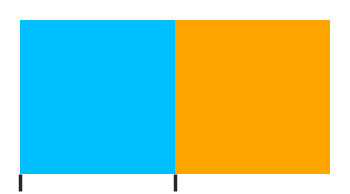

In [4]:
# View cp1 color palette
sns.palplot(cp1)

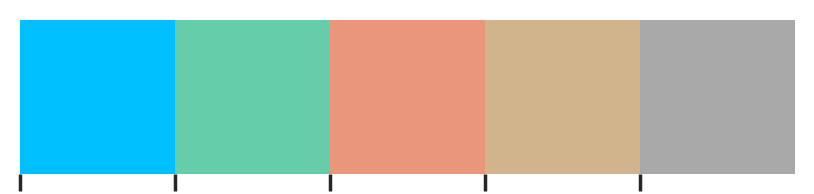

In [5]:
# View cp2 color palette
sns.palplot(cp2)

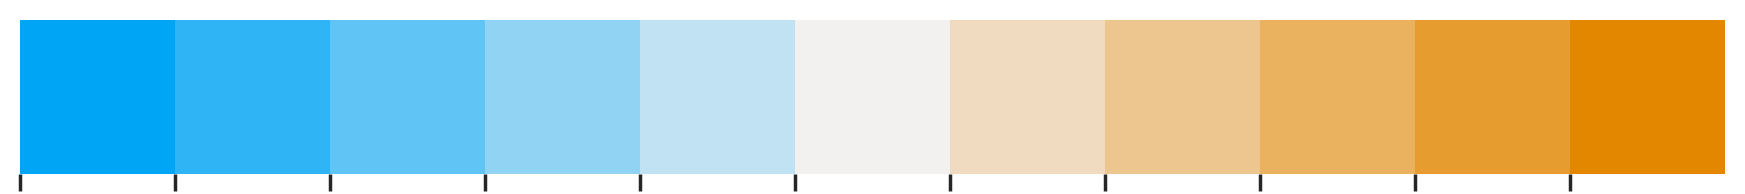

In [6]:
# View cp3 color palette
sns.palplot(cp3)

## Read and Review Data

In [8]:
df = pd.read_csv('data/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# View dataframe fundamentals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Drop irrelevant columns
These appear irrelevant to predicting survival:
- PassengerId
- Name
- Ticket

In [10]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

# Preview the updated dataframe
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Explore Numeric Features

- **Survived** is binary: 1 = yes; 0 = no --> but it is the target variable, so we will keep it for exploration with the continuous features
- **Pclass** is ordinal: 1st, 2nd, 3rd classes
- **Age** is continuous with integer values
- **SibSp** is ordinal, because a very small range: 1, 2, 3, etc. siblings or spouses
- **Parch** is ordinal, because a very small range: 1, 2, 3, etc. parents or children 
- **Fare** is continuous with float values

In [11]:
# Store numeric features to a variable for easy re-use
cont = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Test our new variable as a filter to preview only those columns
df[cont].head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [12]:
# View summary statistics for these continuous features
df[cont].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations**
- 38.3% of passengers survived
- The majority of passengers were in 2nd or 3rd class.
- The average age was 29. The youngest was under a year. The oldest was 80.
- Most passengers had no sibling or spouse aboard, and no parent-child relationship.
- Median fare was 14, while the highest was 512.

### Did survivors' stats for these features differ markedly from non-survivors'?
Let's compare the mean values for these features for these groups.

In [13]:
# Compare mean values for these features, grouped by Survived
df[cont].groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


**Observations:**
- Pclass: survivors tended to be upper class (1st or 2nd)
- Age: survivors were slightly younger in average age
- SubSp: survivors averaged fewer siblings
- Parch: survivors averaged slightly higher parent/child relations
- Fare: average survivors paid more than twice the ticket price of non-survivors

### Investigate impact of null values for Age

In [14]:
# How many null values for Age?
df['Age'].isnull().sum()

177

Did those with null for age have a different survival rate?

In [15]:
df[cont].groupby(df[cont]['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


On average, those with null values for age: 
- had a 10.7% lower chance of surviving
- were in 2nd or 3rd passenger classes
- were significantly less likely to have a parent or child on board
- paid significantly lower ticket prices

## Age Distributions
Compare age distributions for survivors and non-survivors

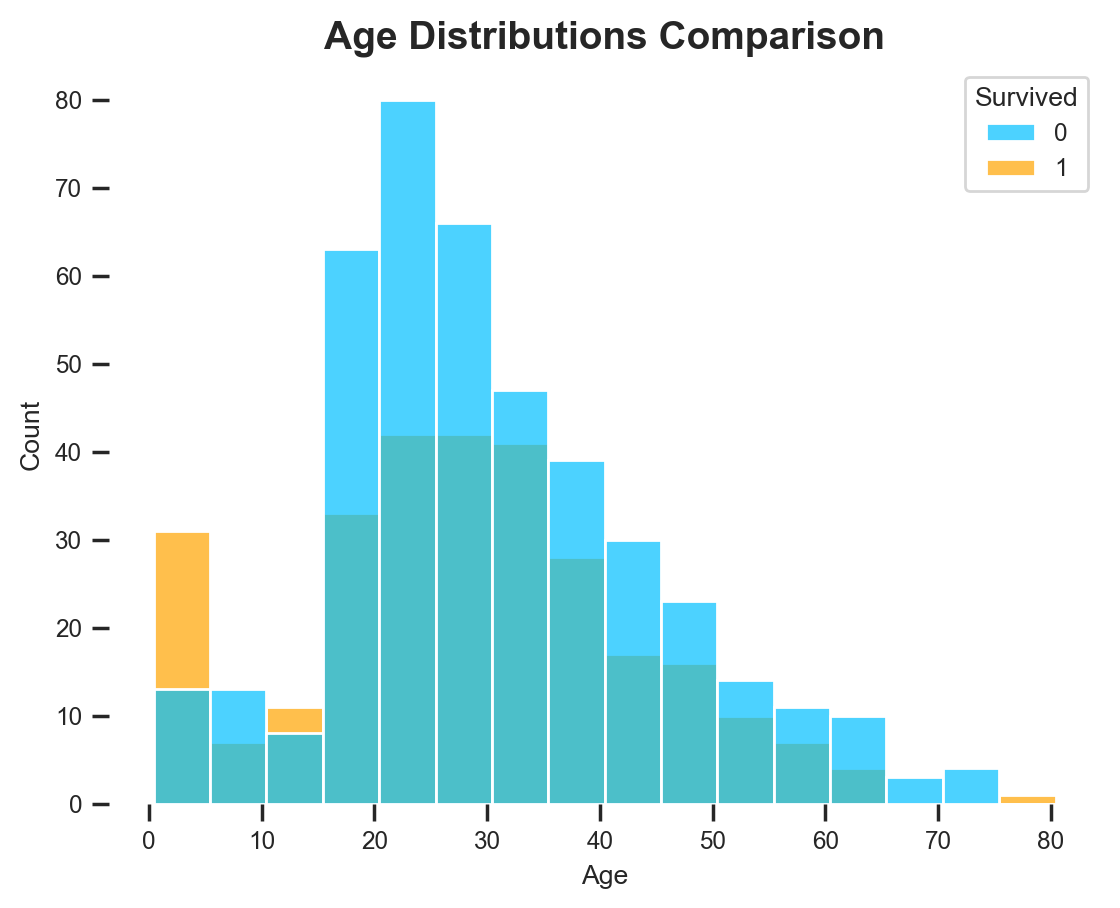

In [16]:
# Histogram: Age Distribution Comparisons by Survival
plt.title("Age Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='Age', hue='Survived', binwidth=5, alpha=0.7);
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

**Interpretation:**
The age distributions for both survivors (1) and non-survivors (0) are very similar _except_ very young passengers (ages 0-5) and young teens were more likely to survive than not.

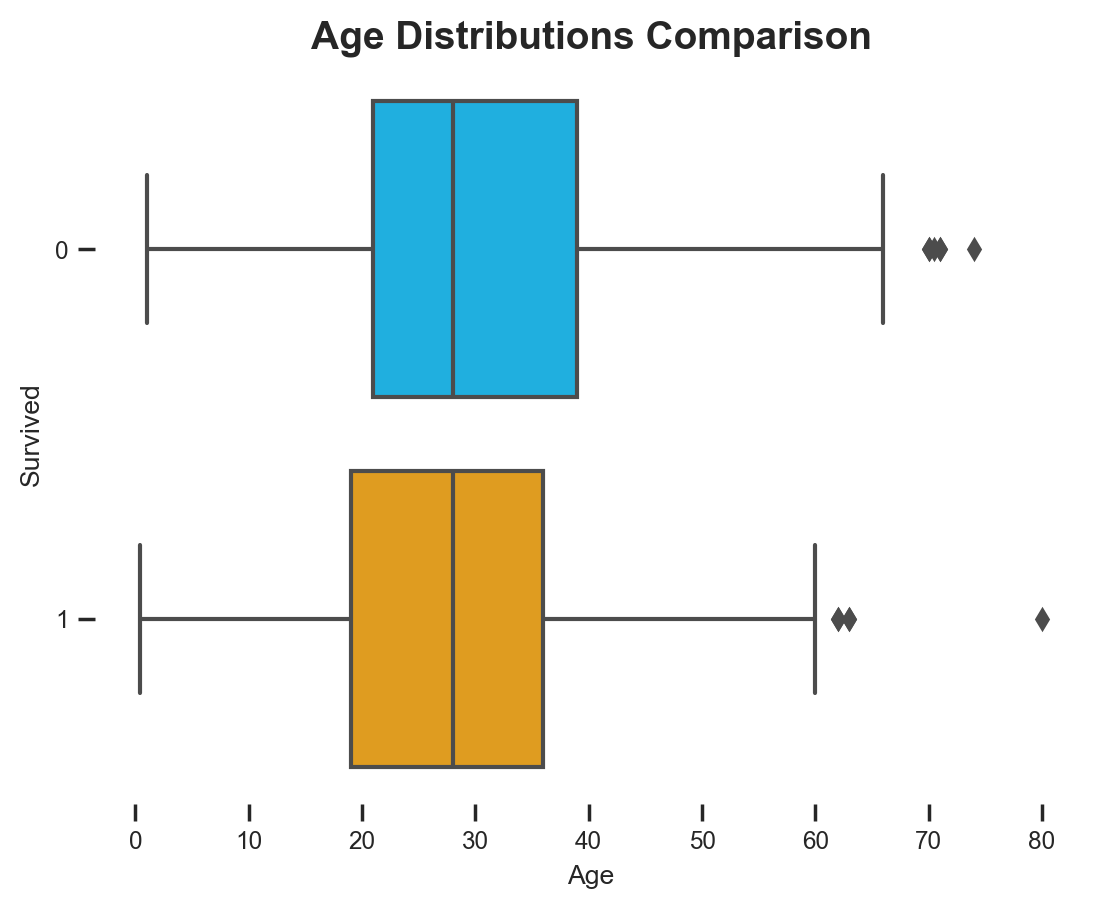

In [17]:
# Horizontal Boxplot: Comparing Age Distributions by Survival
plt.title("Age Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.boxplot(data=df, x='Age', y='Survived', orient='h');
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

**Interpretation:** The box plots show more clearly that most survivors were slightly younger than non-survivors.

## Fare Distributions
Is there a pattern to survival rates by ticket price?

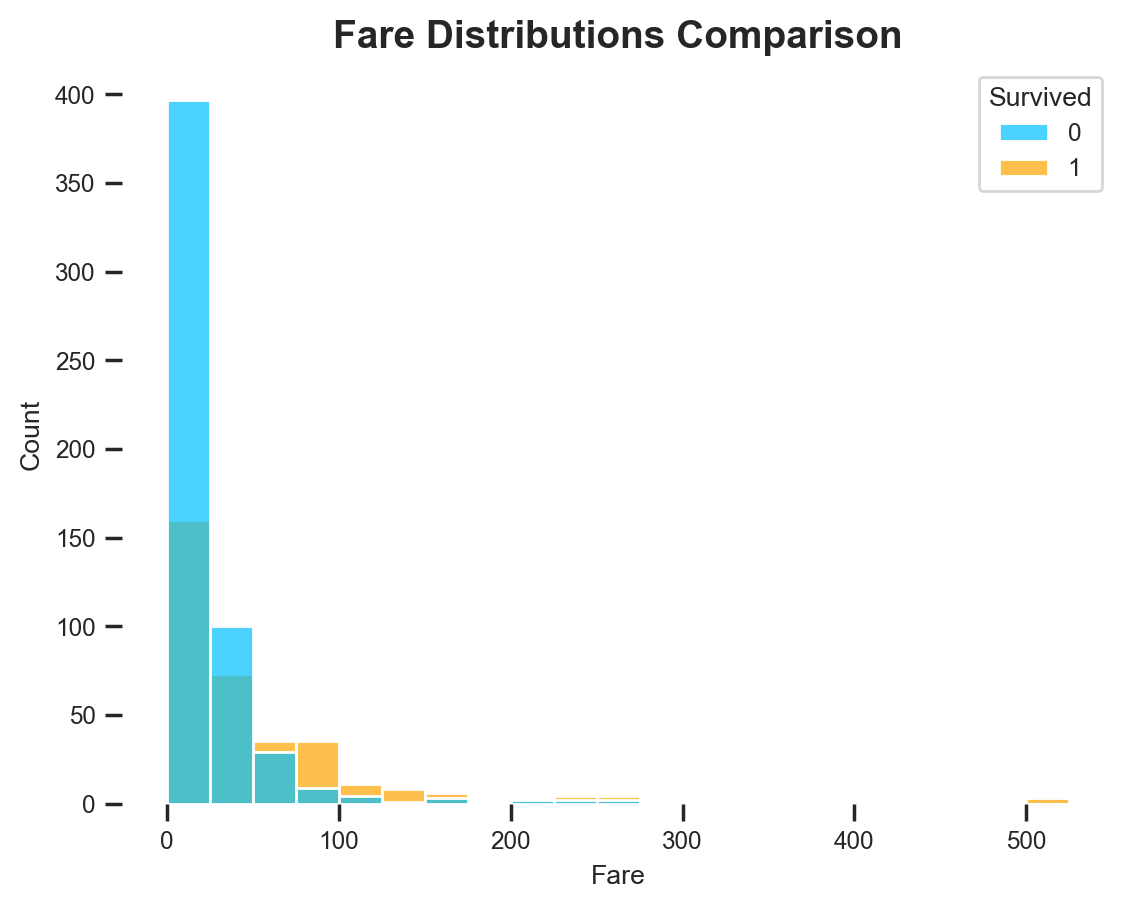

In [18]:
# Histogram: Fare Distribution Comparisons by Survival
plt.title("Fare Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='Fare', hue='Survived', binwidth=25, alpha=0.7);
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

Those with tickets priced around $40 or more were more likely to survive.

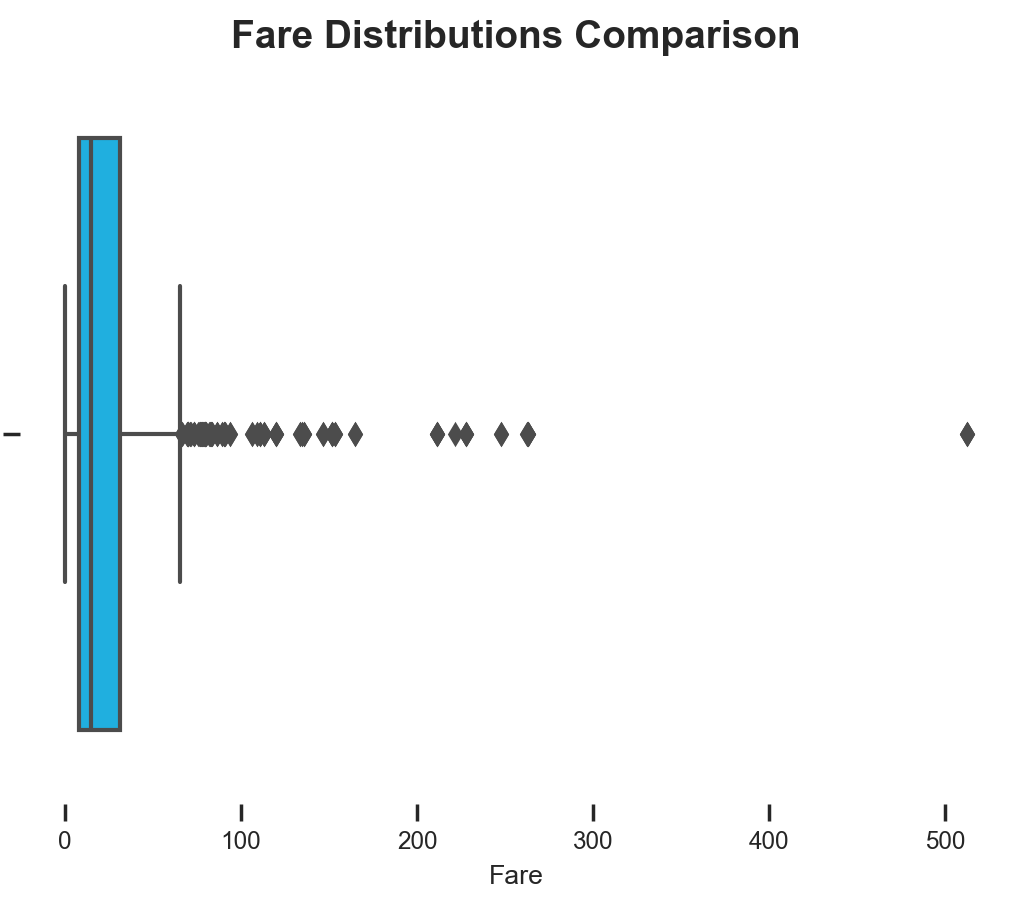

In [39]:
# Boxplot: Fare Distributions Comparison by Survival
plt.title("Fare Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.boxplot(data=df, x='Fare')

### Continuous Variables Summary
- **Age** appears somewhat relevant to predicting survival. **177** null values need attention.
- **Fare** appears very relevant to predicting survival. Those with a ticket priced at $40 or greater were more likely to survive than not.

# Explore Ordinal Features
Pclass, SibSp, and Parch are more accurately considered ordinal variables, so let's explore those here.

- **Pclass:** passenger class ranges from 1st to 3rd
- **SibSp:** Sibling and Spouse relationships range from 1 to 8
- **Parch:** Parent child relationships range from 1 to 6

In [33]:
# Create variable to hold ordinal features, plus Survived
ord = ['Survived','Pclass','SibSp','Parch']

# View summary stats
df[ord].describe()

,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


Compare the mean values for survivors and non-survivors

In [34]:
df[ord].groupby('Survived').mean()

,Pclass,SibSp,Parch
Survived,,,
0,2.531876,0.553734,0.329690
1,1.950292,0.473684,0.464912


**Interpretation:**
- Survivors tended to be first or second class.
- Survivors averaged slightly fewer siblings and/or spouses.
- Survivors averaged slightly more parent-child relationships.

### Explore Pclass

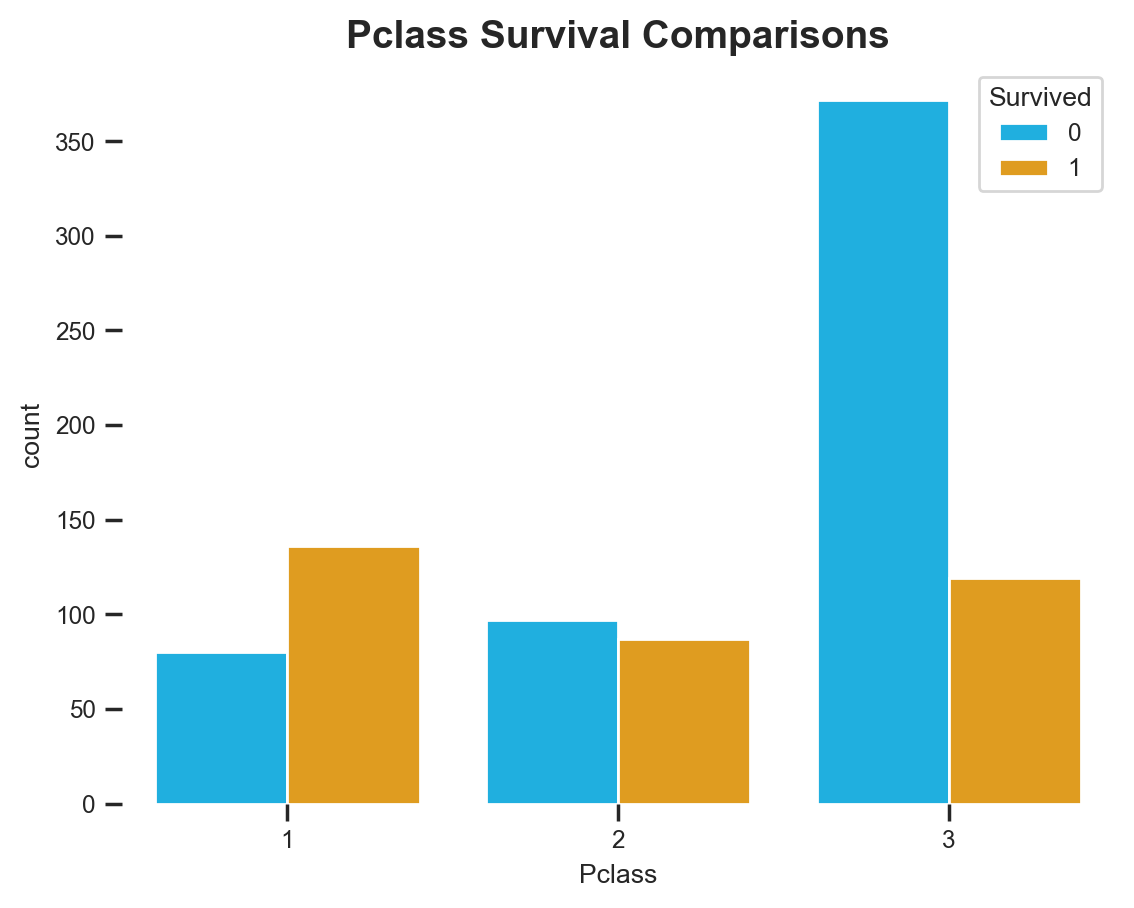

In [35]:
# Countplot comparing survivors vs. non-survivors by Pclass
plt.title("Pclass Survival Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='Pclass', hue='Survived');
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

In [36]:
# Calculate survival rate by Pclass
df['Survived'].groupby(df['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_7619/2024235003.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Pclass', y='Survived', ci=None, color=blue);


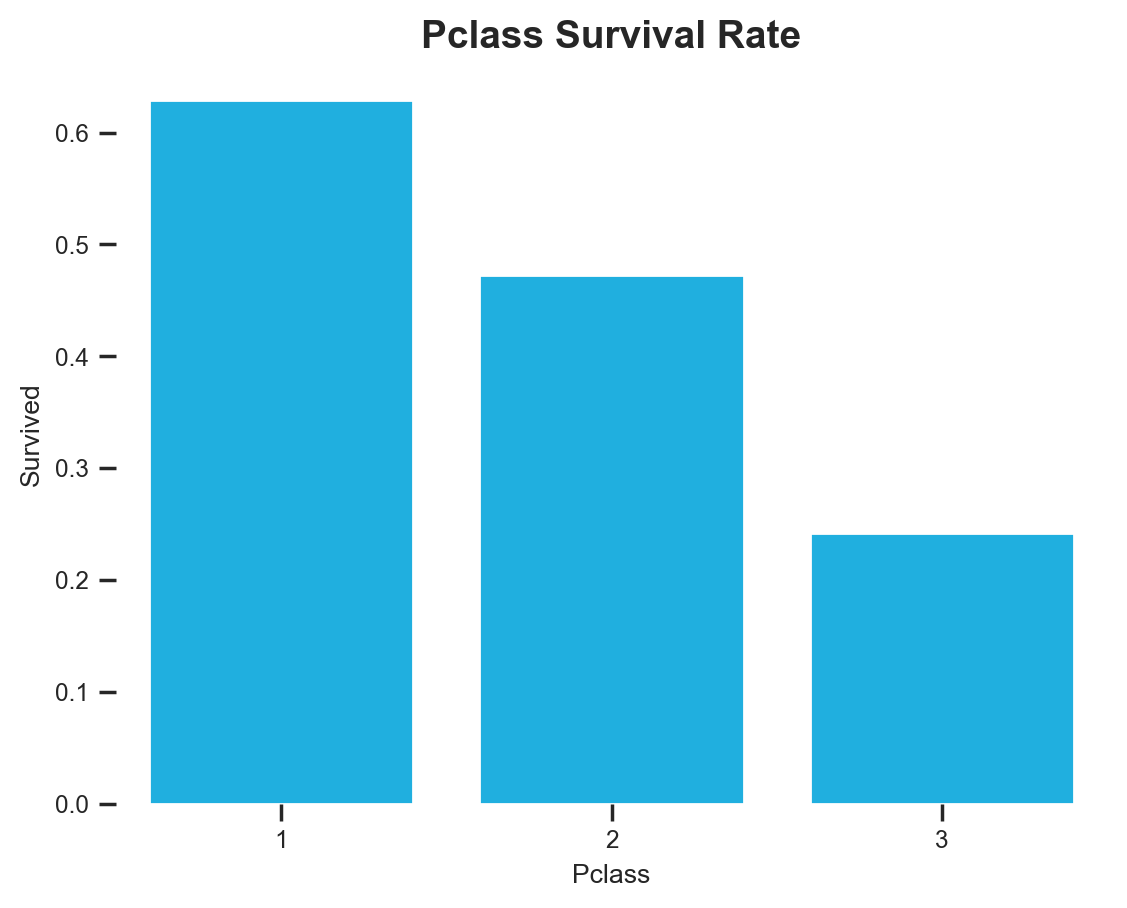

In [37]:
# Barplot survival rate by Pclass
plt.title("Pclass Survival Rate", fontsize=14, fontweight='bold')
ax = sns.barplot(data=df, x='Pclass', y='Survived', ci=None, color=blue);
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

**Interpretation**: Pclass is *highly* relevant to predicting survival, with lower Pclass numbers corresponding with higher survival probability.

### Explore Sibsp

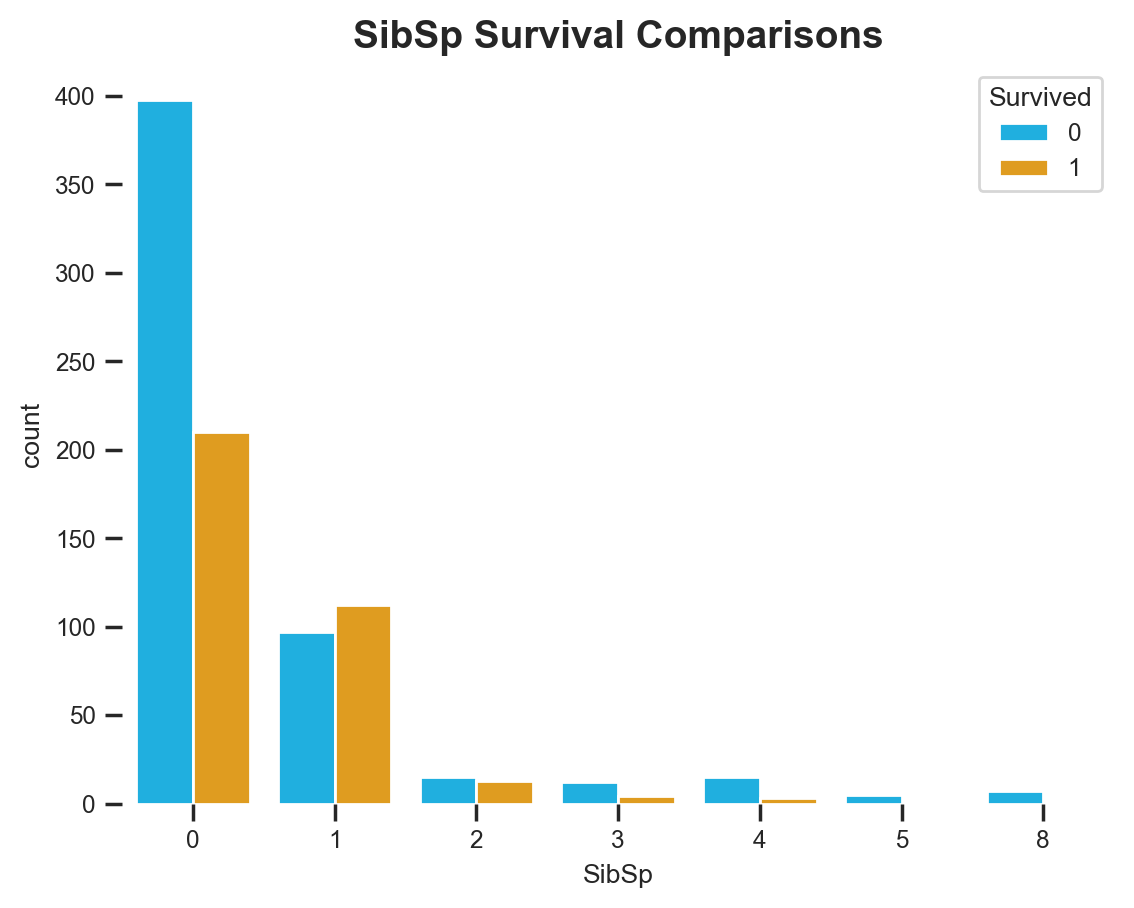

In [40]:
# SibSp countplot for survival comparisons
plt.title("SibSp Survival Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='SibSp', hue='Survived');

In [41]:
# Calculate survival rate by SibSp
df['Survived'].groupby(df['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_7619/2271065097.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='SibSp', y='Survived', ci=None, color=blue);


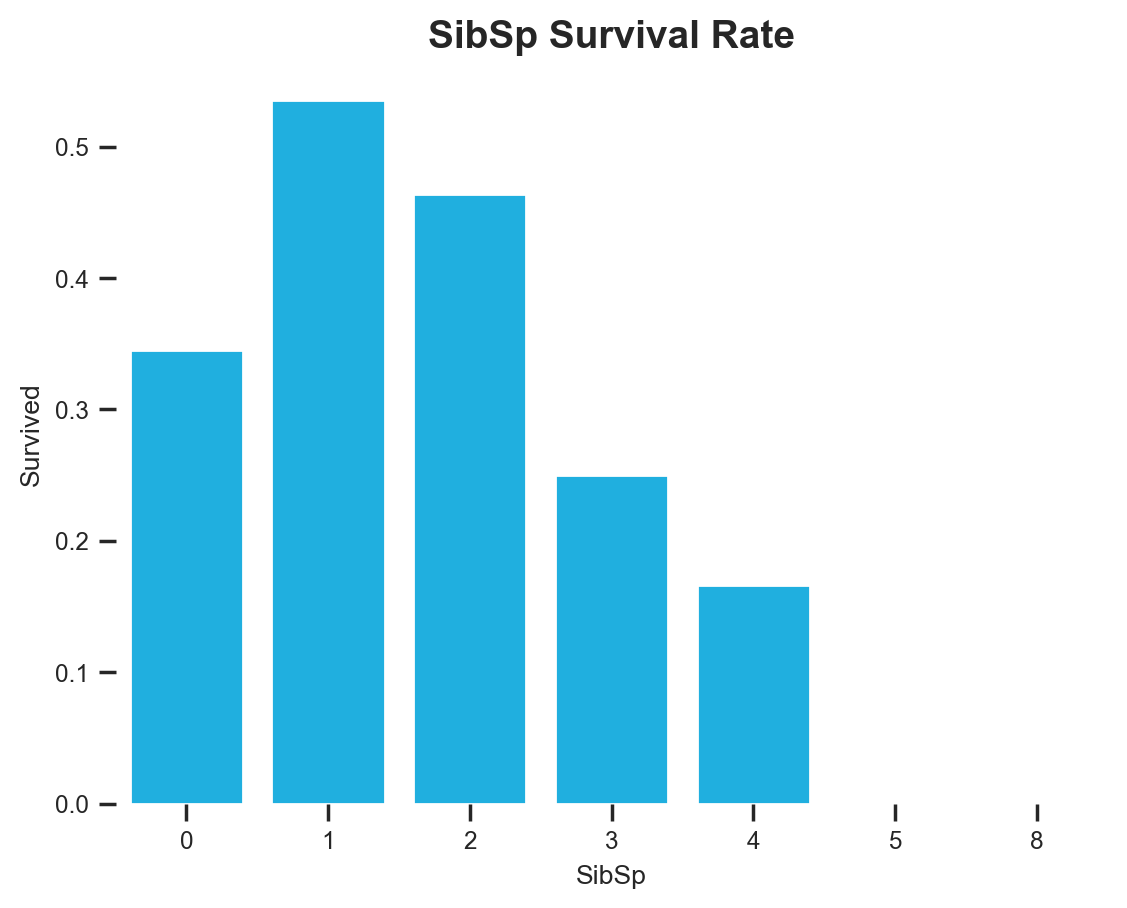

In [42]:
# Barplot survival rate by SibSp
plt.title("SibSp Survival Rate", fontsize=14, fontweight='bold')
ax = sns.barplot(data=df, x='SibSp', y='Survived', ci=None, color=blue);

**Interpretation:** 
- We see that number of siblings or spouses on board is inversely correlated with survival in terms of absolute number, but in terms of percentage, it seems like passengers with 1 spouse or sibling had higher rates of survival relative to other passengers with also 1 spouse or sibling.

### Explore Parch

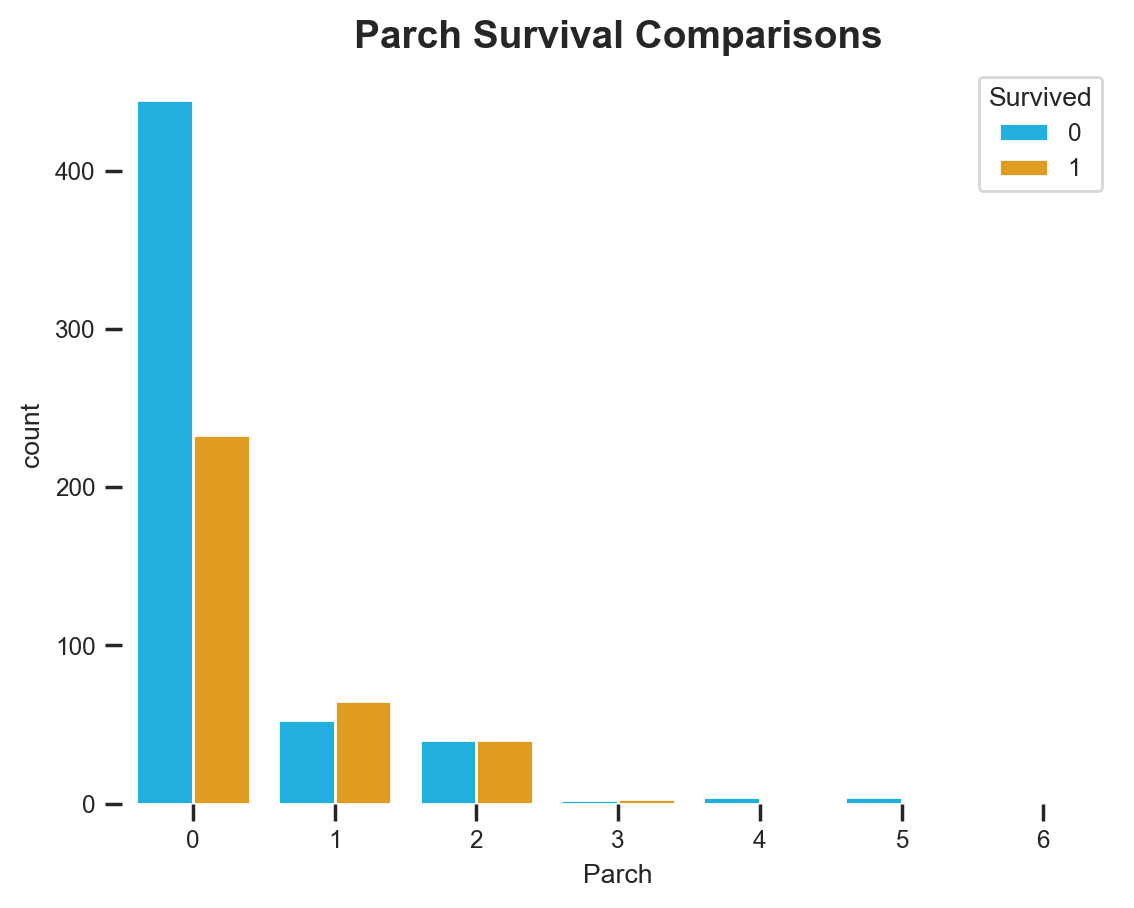

In [43]:
# Countplot comparing survived vs non-survived for Parch
plt.title("Parch Survival Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='Parch', hue='Survived');

In [44]:
# Calculate survival rate by Parch
df['Survived'].groupby(df['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_7619/634392079.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Parch', y='Survived', ci=None, color=blue);


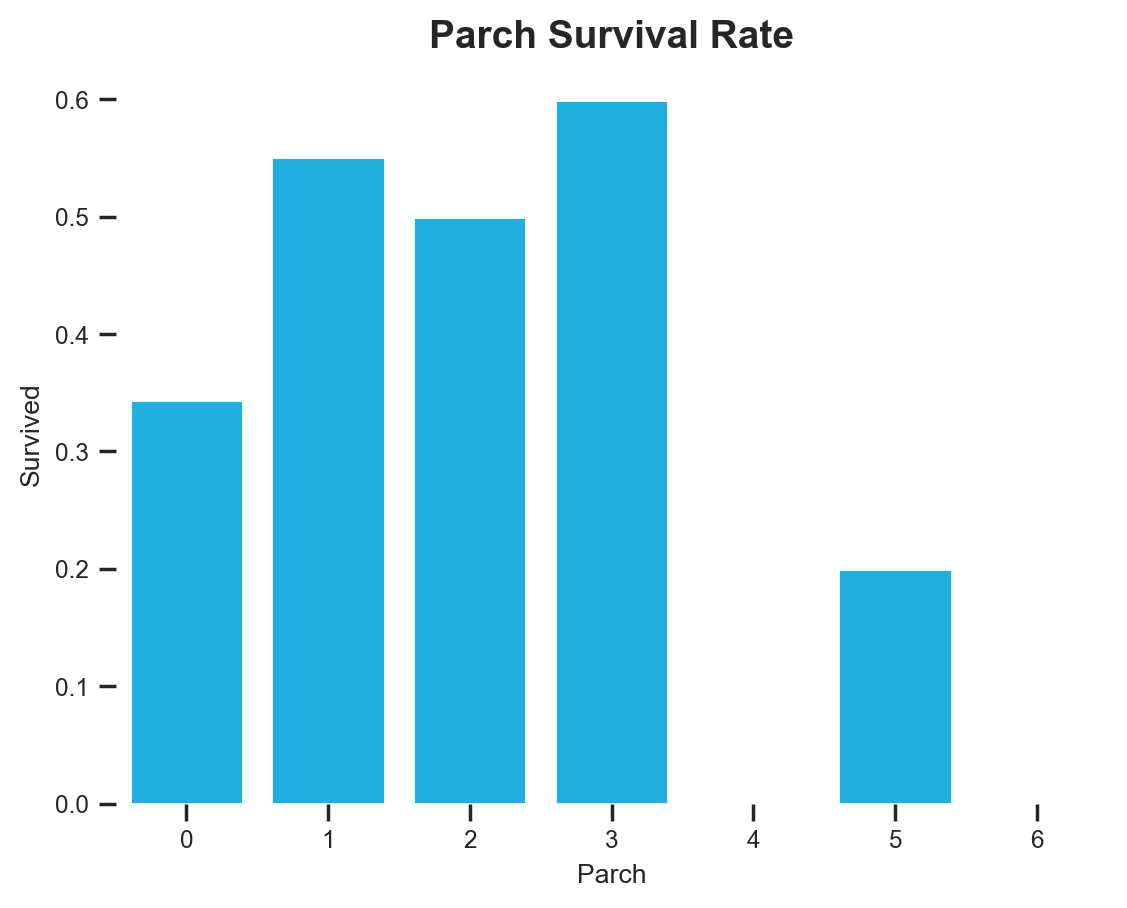

In [45]:
# Barplot survival rate by Parch
plt.title("Parch Survival Rate", fontsize=14, fontweight='bold')
ax = sns.barplot(data=df, x='Parch', y='Survived', ci=None, color=blue);

**Interpretation:**
- We see that in terms of absolute number of passengers survived, parch is inversely correlated. However, in terms of relative survival rate, it has no relation that I can discern.

# Clean Numeric Data

### Fill Nulls for Age with Average Age

In [49]:
# Follow Jedamski's Cleaning Continuous Variables video.
# Replace these comments with your own and code.
# Add new cells as needed.
df.groupby(df['Age'].isnull()).mean()

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_7619/299048276.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Age'].isnull()).mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [52]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Create `Family_count` from `SibSp` and `Parch`
Reduce [multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp) and enhance the data modeling by combining SibSp and Parch into one variable, the sum of SibSp + Parch.

In [53]:
# Create Family_count
# Add new cells as needed.
df['family_count'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_count
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


### Explore the new `Family_count` variable

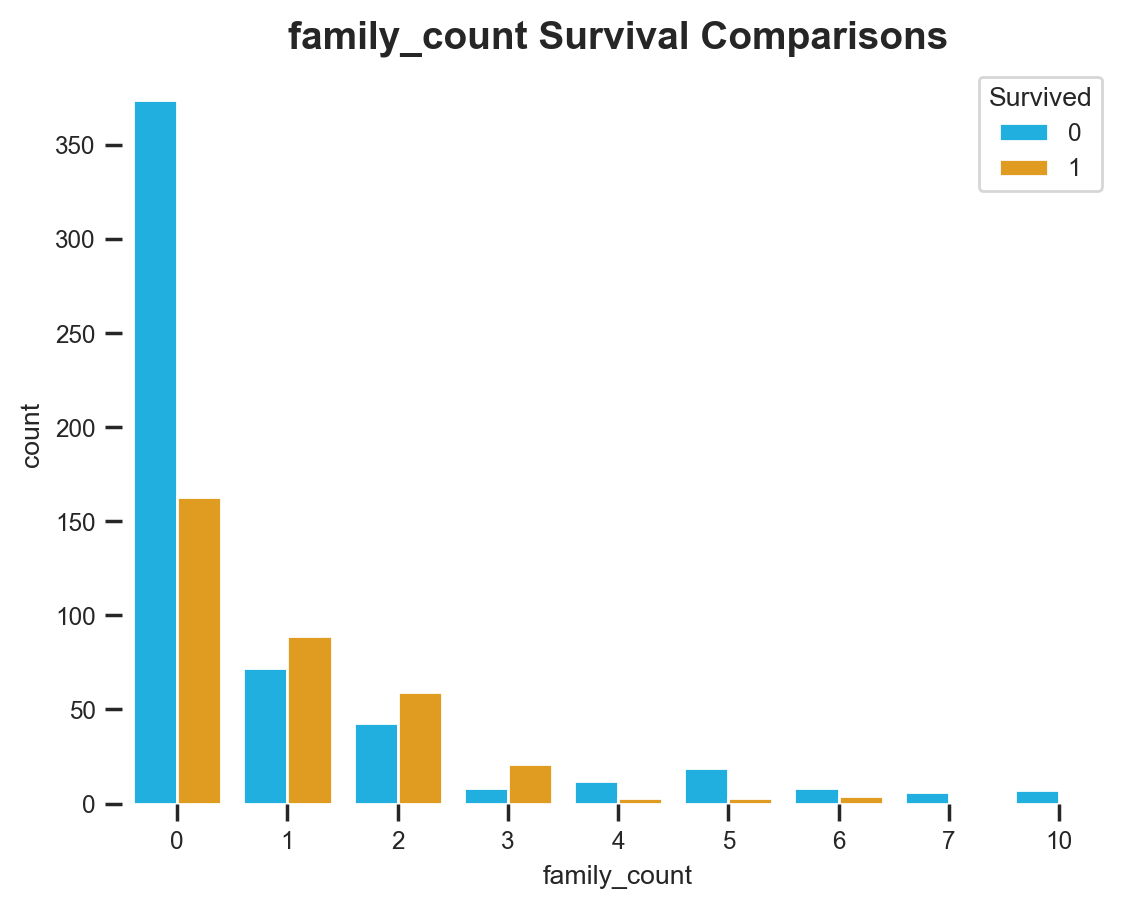

In [55]:
# Countplot comparing survived vs. non for Family_count
plt.title("family_count Survival Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='family_count', hue='Survived');

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_7619/2719942452.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='family_count', y='Survived', ci=None, color=blue);


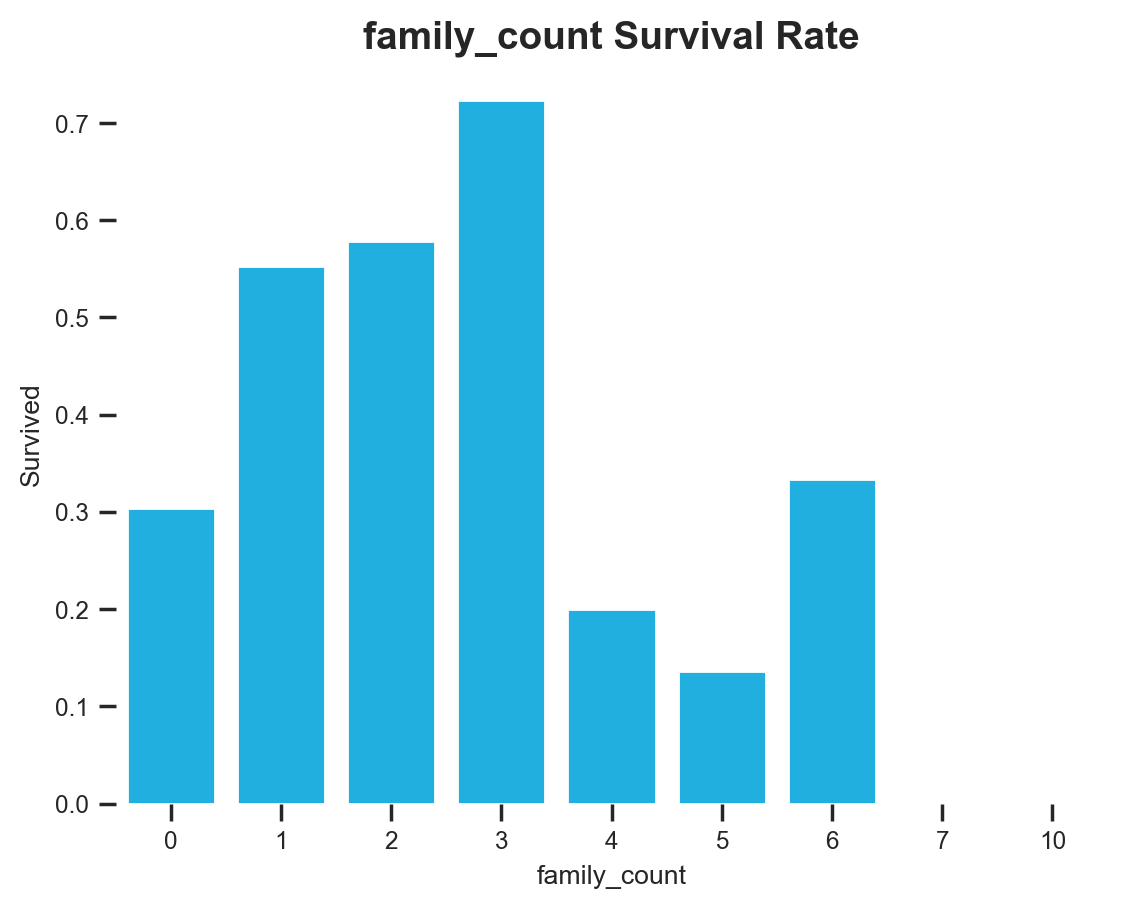

In [56]:
# Barplot comparing average survival rate by Family_count
plt.title("family_count Survival Rate", fontsize=14, fontweight='bold')
ax = sns.barplot(data=df, x='family_count', y='Survived', ci=None, color=blue);

**Intepretation:** 
- Like with SibSp and Parch, the number of family a passenger has on board seems to have an inverse correlation to survival, but no seemingly discernible relation to relative survival rate.

### Drop `SibSp` & `Parch`
- These are now redundant with `Family_count`.
- We need to remove them to avoid a [multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp) problem.

In [57]:
# See cell above

# Explore Categorical Features

In [58]:
# Create a variable to hold our categorical features, plus Survived as the target variable
cat = ['Survived','Sex','Cabin','Embarked']
df[cat].head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C85,C
2,1,female,NaN,S
3,1,female,C123,S
4,0,male,NaN,S


In [59]:
# View informational summary of these categorical features
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Cabin     204 non-null    object
 3   Embarked  889 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.0+ KB


In [65]:
df.drop('family_count', axis=1, inplace=True)

In [66]:
df.groupby(df['Cabin'].isnull()).mean()

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_7619/1881779096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Cabin'].isnull()).mean()


,Survived,Pclass,Age,Fare,cabin_ind
Cabin,,,,,
False,0.666667,1.196078,35.258349,76.141504,1.0
True,0.299854,2.639010,28.048341,19.157325,0.0


In [62]:
df['cabin_ind'] = np.where(df['Cabin'].isnull(), 0, 1)

In [63]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_count,cabin_ind
0,0,3,male,22.0,7.2500,NaN,S,1,0
1,1,1,female,38.0,71.2833,C85,C,1,1
2,1,3,female,26.0,7.9250,NaN,S,0,0
3,1,1,female,35.0,53.1000,C123,S,1,1
4,0,3,male,35.0,8.0500,NaN,S,0,0


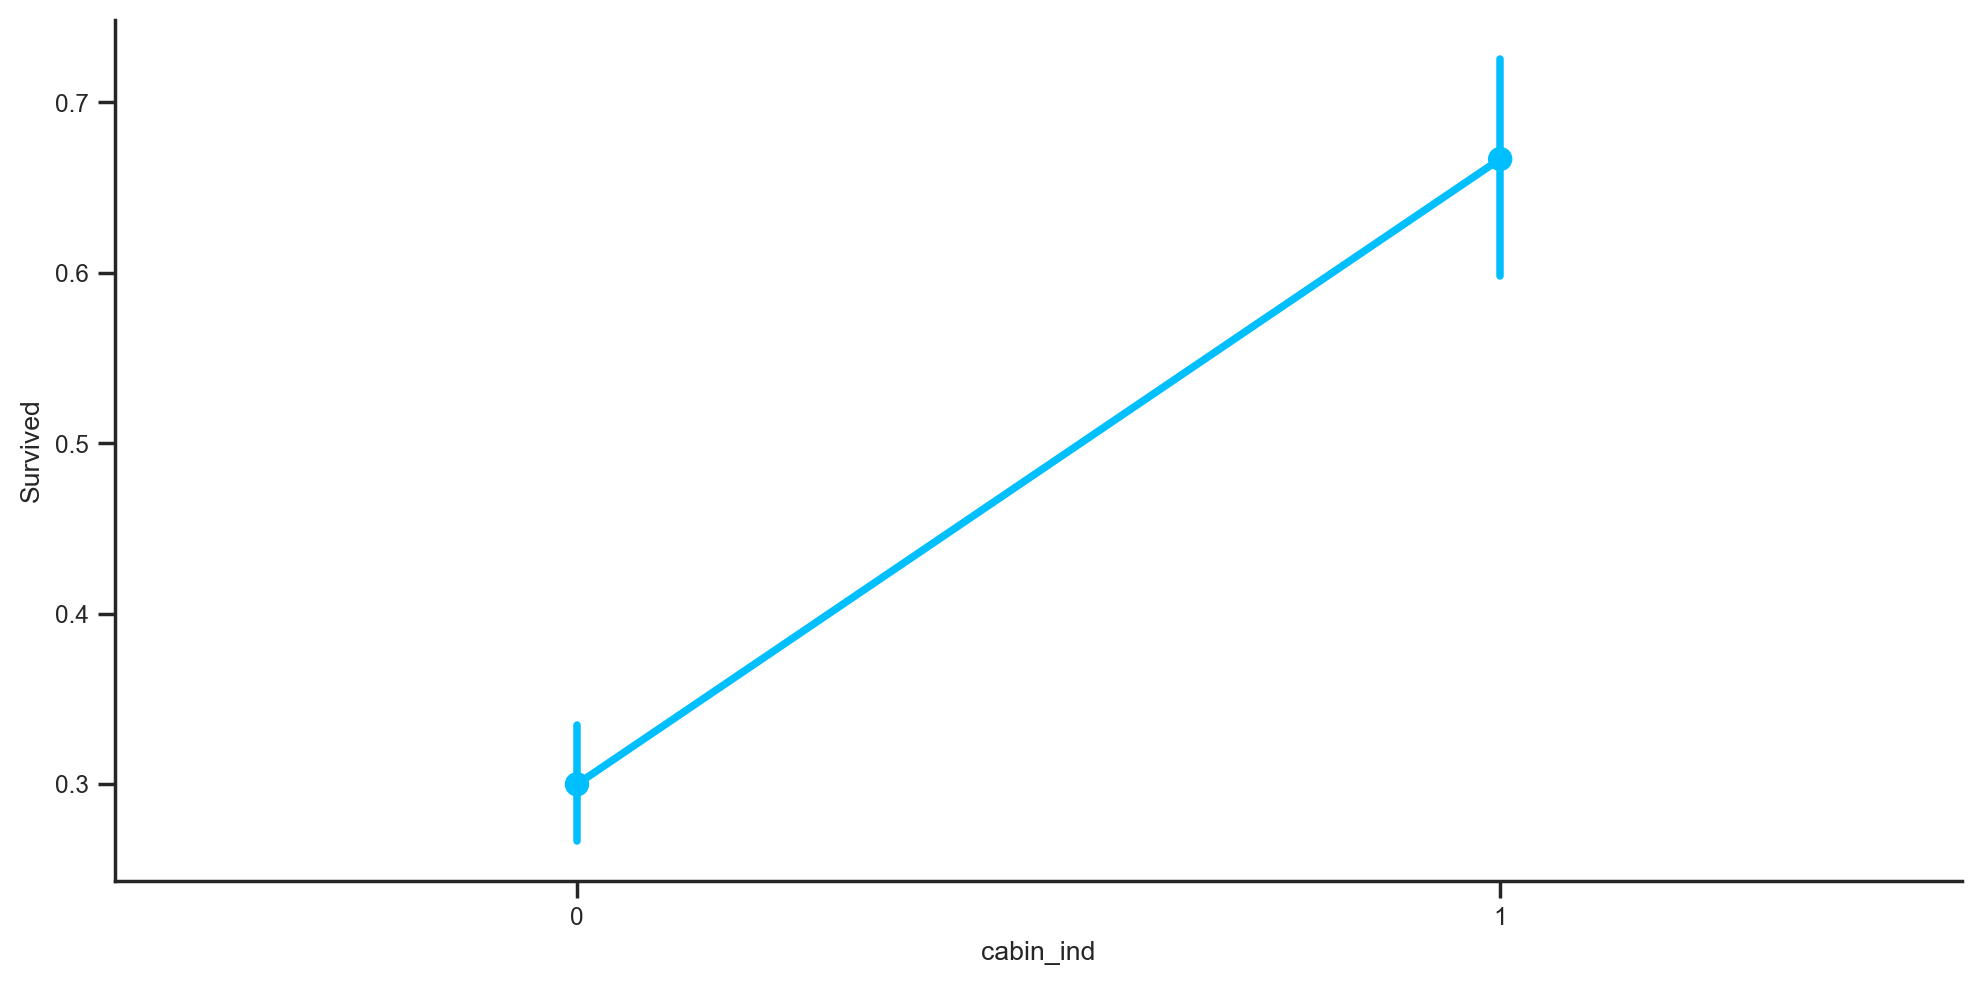

In [69]:
# Countplot comparing survived vs. non for cabin_ind
ax = sns.catplot(x='cabin_ind', y='Survived', data=df, kind='point', aspect=2)

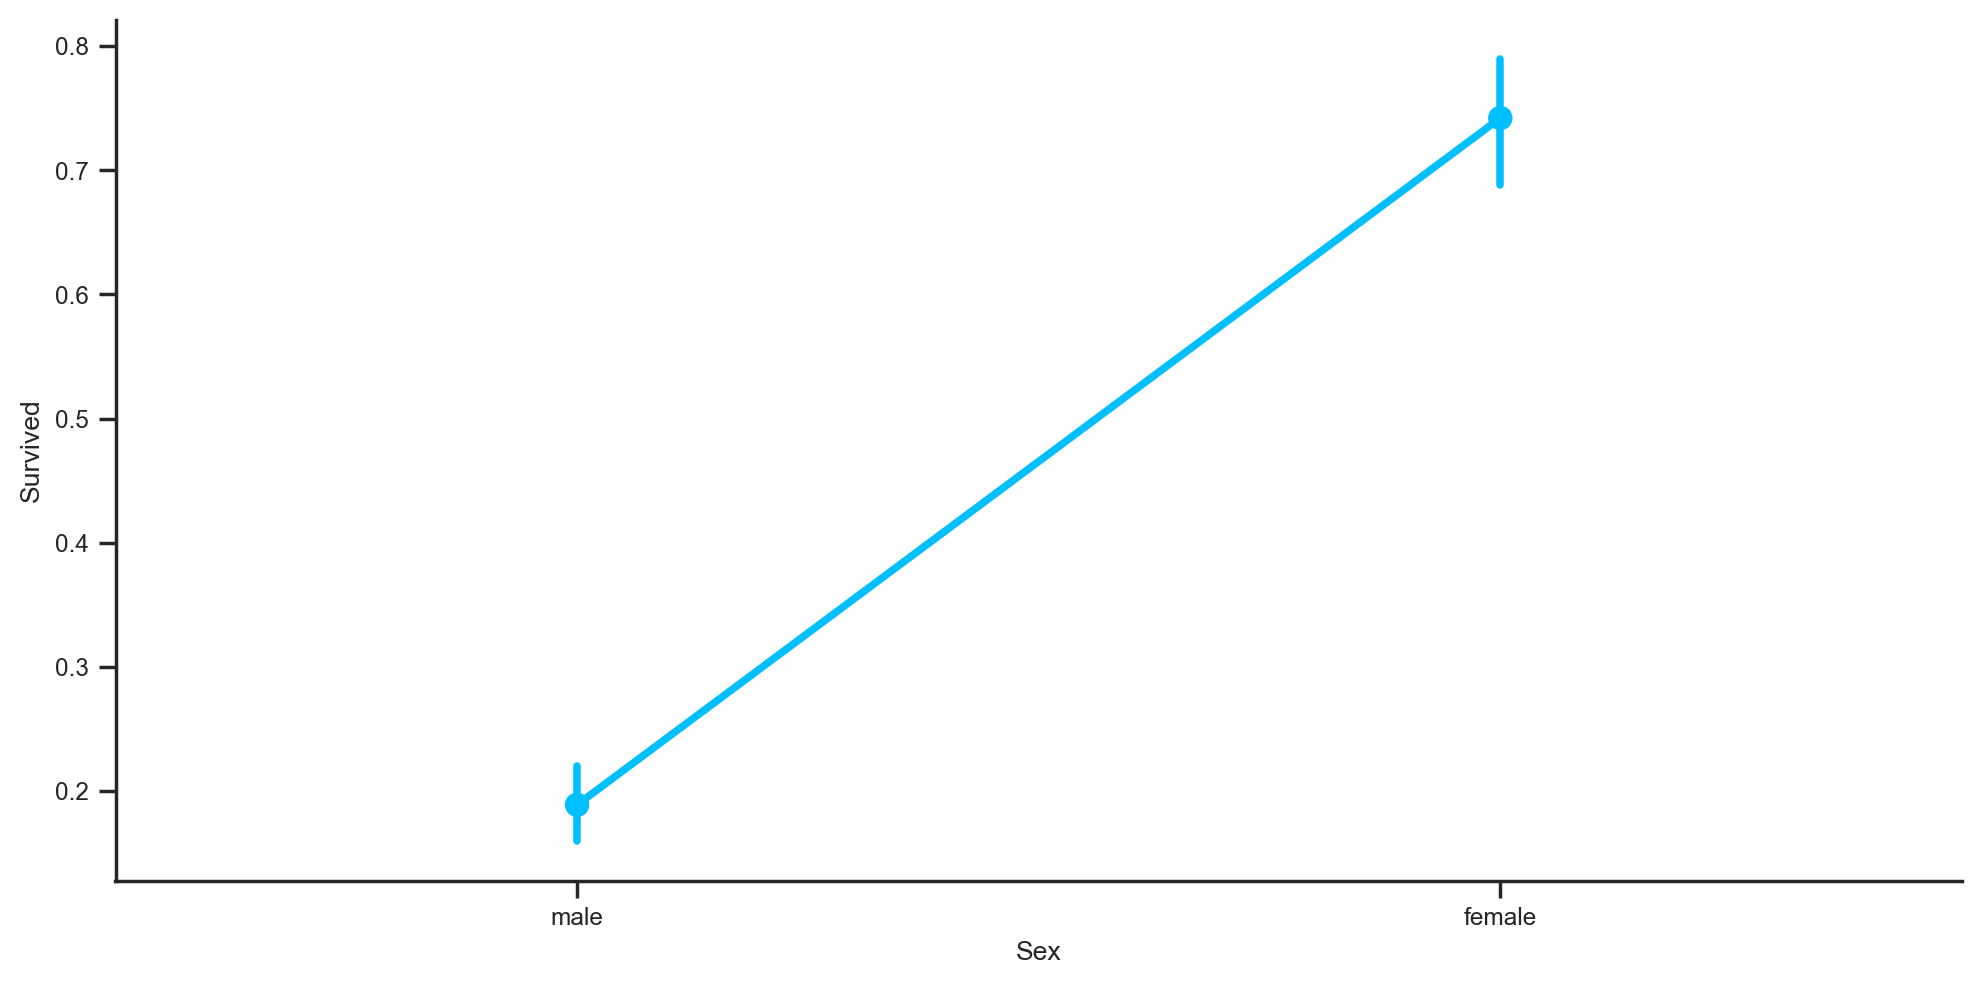

In [70]:
# Countplot comparing survived vs. non for sex
ax = sns.catplot(x='Sex', y='Survived', data=df, kind='point', aspect=2)

**Intepretation:** 
- Cabin indicator and sex have similar catplots; it may be worth exploring their relationship.

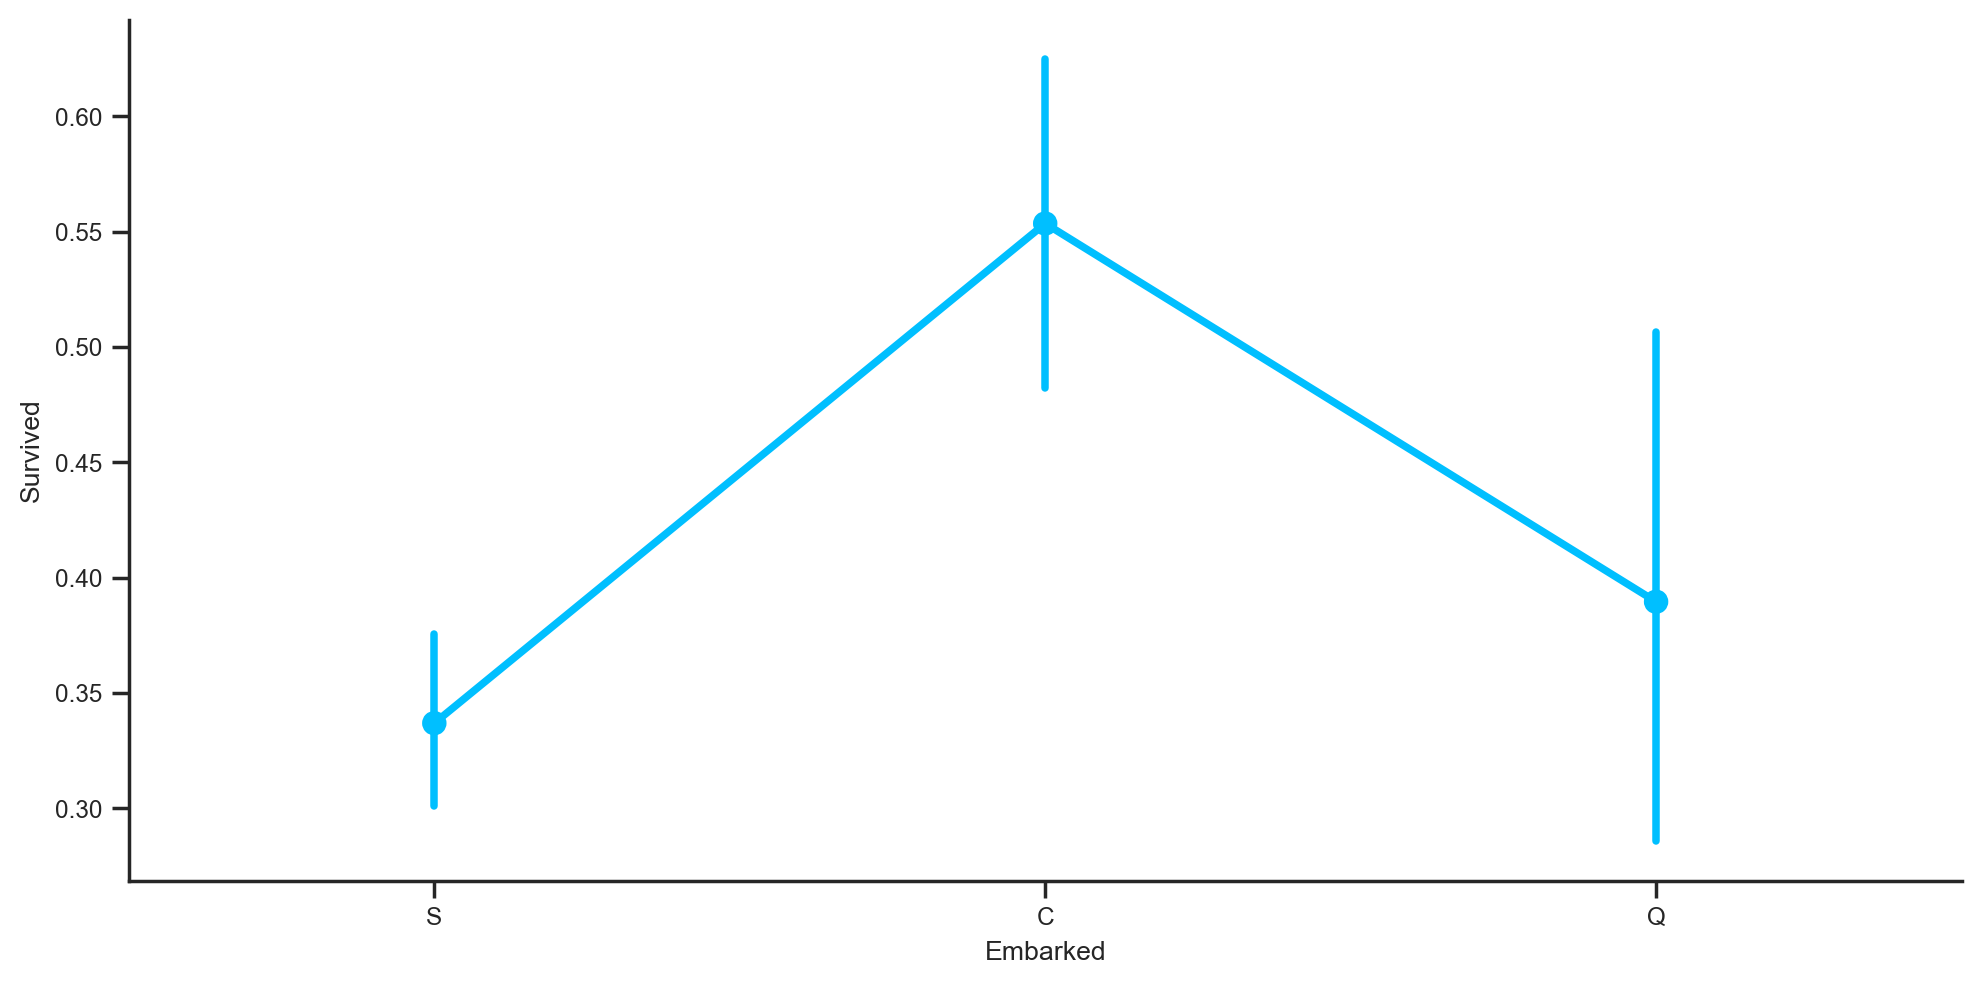

In [71]:
# Countplot comparing survived vs. non for Embarked
ax = sns.catplot(x='Embarked', y='Survived', data=df, kind='point', aspect=2)

**Intepretation:** 
- Embarked location may be confounded by other features, such as more males embarking from S or Q.

In [72]:
df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


**Intepretation:** 
- We see over twice as many males embarked from S than females, and since males had lower survival rates than females, it would make sense that embarked is partially confounded by sex.

In [73]:
df.pivot_table('Survived', index='cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
cabin_ind,,,
0,99,73,515
1,69,4,129


**Intepretation:** 
- We see C's survival rate matches up with cabin indicator, so embarked may be partially confounded by cabin indicator.

In [74]:
# Convert sex to numeric
gender_num = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender_num)

In [75]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,cabin_ind
0,0,3,0,22.0,7.2500,NaN,S,0
1,1,1,1,38.0,71.2833,C85,C,1
2,1,3,1,26.0,7.9250,NaN,S,0
3,1,1,1,35.0,53.1000,C123,S,1
4,0,3,0,35.0,8.0500,NaN,S,0


In [77]:
# Drop Cabin and Embarked because they are irrelavent due to cabin indicator and the data exploration above.
df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,Fare,cabin_ind
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


# Export Cleaned Data to CSV

In [80]:
df.to_csv('data/titanic_cleaned.csv', index=False)